In [572]:
# import libraries
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

In [2]:
#import data
df = pd.read_csv('C:/Users/Scoldingatom/Downloads/CutomerChurnData.csv')
df

,cust_id,region,tenure,age,marital,address,income,ed,employ,retire,...,internet,callid,callwait,forward,confer,ebill,loglong,lninc,custcat,churn
0,C00124,R2,13,44,Y,9,64,E4,5,N,...,N,N,N,Y,N,N,1.308,4.159,C1,Y
1,C00125,R3,68,52,Y,24,116,E1,29,N,...,N,Y,Y,N,Y,N,2.899,4.754,C3,N
2,C00126,R2,23,30,Y,9,30,E1,2,N,...,N,Y,N,Y,Y,N,1.841,3.401,C3,N
3,C00127,R3,45,22,Y,2,19,E2,4,N,...,Y,N,Y,N,N,Y,2.389,2.944,C2,Y
4,C00128,R3,45,59,Y,7,166,E4,31,N,...,N,Y,Y,Y,Y,N,2.277,5.112,C3,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C01119,R1,50,43,N,6,27,E3,4,N,...,N,Y,Y,Y,Y,N,2.708,3.296,C3,N
996,C01120,R1,34,52,Y,2,106,E2,19,N,...,Y,Y,N,Y,Y,N,1.599,4.663,C3,N
997,C01121,R1,15,46,Y,17,63,E5,1,N,...,Y,Y,N,Y,Y,Y,1.308,4.143,C4,Y
998,C01122,R1,7,34,N,2,22,E5,5,N,...,N,N,N,N,N,N,1.537,3.091,C1,N


# Data Exploration

In [3]:
# Learn about data types and all column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cust_id   1000 non-null   object 
 1   region    1000 non-null   object 
 2   tenure    1000 non-null   int64  
 3   age       1000 non-null   int64  
 4   marital   1000 non-null   object 
 5   address   1000 non-null   int64  
 6   income    1000 non-null   int64  
 7   ed        1000 non-null   object 
 8   employ    1000 non-null   int64  
 9   retire    1000 non-null   object 
 10  gender    1000 non-null   object 
 11  reside    1000 non-null   int64  
 12  tollfree  1000 non-null   object 
 13  equip     1000 non-null   object 
 14  callcard  1000 non-null   object 
 15  wireless  1000 non-null   object 
 16  longmon   1000 non-null   float64
 17  tollmon   1000 non-null   float64
 18  equipmon  1000 non-null   float64
 19  cardmon   1000 non-null   float64
 20  wiremon   1000 non-null   float

In [4]:
# Examine five summary statistic
df.describe()

,tenure,age,address,income,employ,reside,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,equipten,cardten,wireten,loglong,lninc
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.242000,41.552000,11.576000,71.906000,10.79000,2.316000,11.163600,13.34350,13.572200,13.911500,10.88070,536.994100,535.407900,440.293200,616.090000,423.188500,2.149468,3.926546
std,21.295937,12.679435,10.132467,80.297826,10.14499,1.434644,9.540451,17.41479,18.850834,14.404653,19.24529,729.764065,867.466796,848.250381,874.929462,961.485455,0.716255,0.778627
min,1.000000,18.000000,0.000000,9.000000,0.00000,1.000000,1.050000,0.00000,0.000000,0.000000,0.00000,1.050000,0.000000,0.000000,0.000000,0.000000,0.049000,2.197000
25%,16.000000,32.000000,3.750000,28.000000,3.00000,1.000000,5.150000,0.00000,0.000000,0.000000,0.00000,86.037500,0.000000,0.000000,0.000000,0.000000,1.639000,3.332000
50%,34.500000,40.000000,9.000000,46.000000,8.00000,2.000000,8.500000,0.00000,0.000000,12.125000,0.00000,288.225000,0.000000,0.000000,362.500000,0.000000,2.140000,3.829000
75%,53.000000,51.000000,18.000000,83.250000,17.25000,3.000000,13.862500,24.25000,30.787500,19.562500,23.58750,700.387500,836.912500,466.512500,871.250000,140.075000,2.629000,4.422000
max,72.000000,77.000000,55.000000,732.000000,47.00000,7.000000,99.950000,173.00000,77.700000,109.250000,109.70000,7257.600000,4905.850000,4758.050000,7515.000000,6444.950000,4.605000,6.596000


array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'address'}>,
        <Axes: title={'center': 'income'}>],
       [<Axes: title={'center': 'employ'}>,
        <Axes: title={'center': 'reside'}>,
        <Axes: title={'center': 'longmon'}>,
        <Axes: title={'center': 'tollmon'}>],
       [<Axes: title={'center': 'equipmon'}>,
        <Axes: title={'center': 'cardmon'}>,
        <Axes: title={'center': 'wiremon'}>,
        <Axes: title={'center': 'longten'}>],
       [<Axes: title={'center': 'tollten'}>,
        <Axes: title={'center': 'equipten'}>,
        <Axes: title={'center': 'cardten'}>,
        <Axes: title={'center': 'wireten'}>],
       [<Axes: title={'center': 'loglong'}>,
        <Axes: title={'center': 'lninc'}>, <Axes: >, <Axes: >]],
      dtype=object)

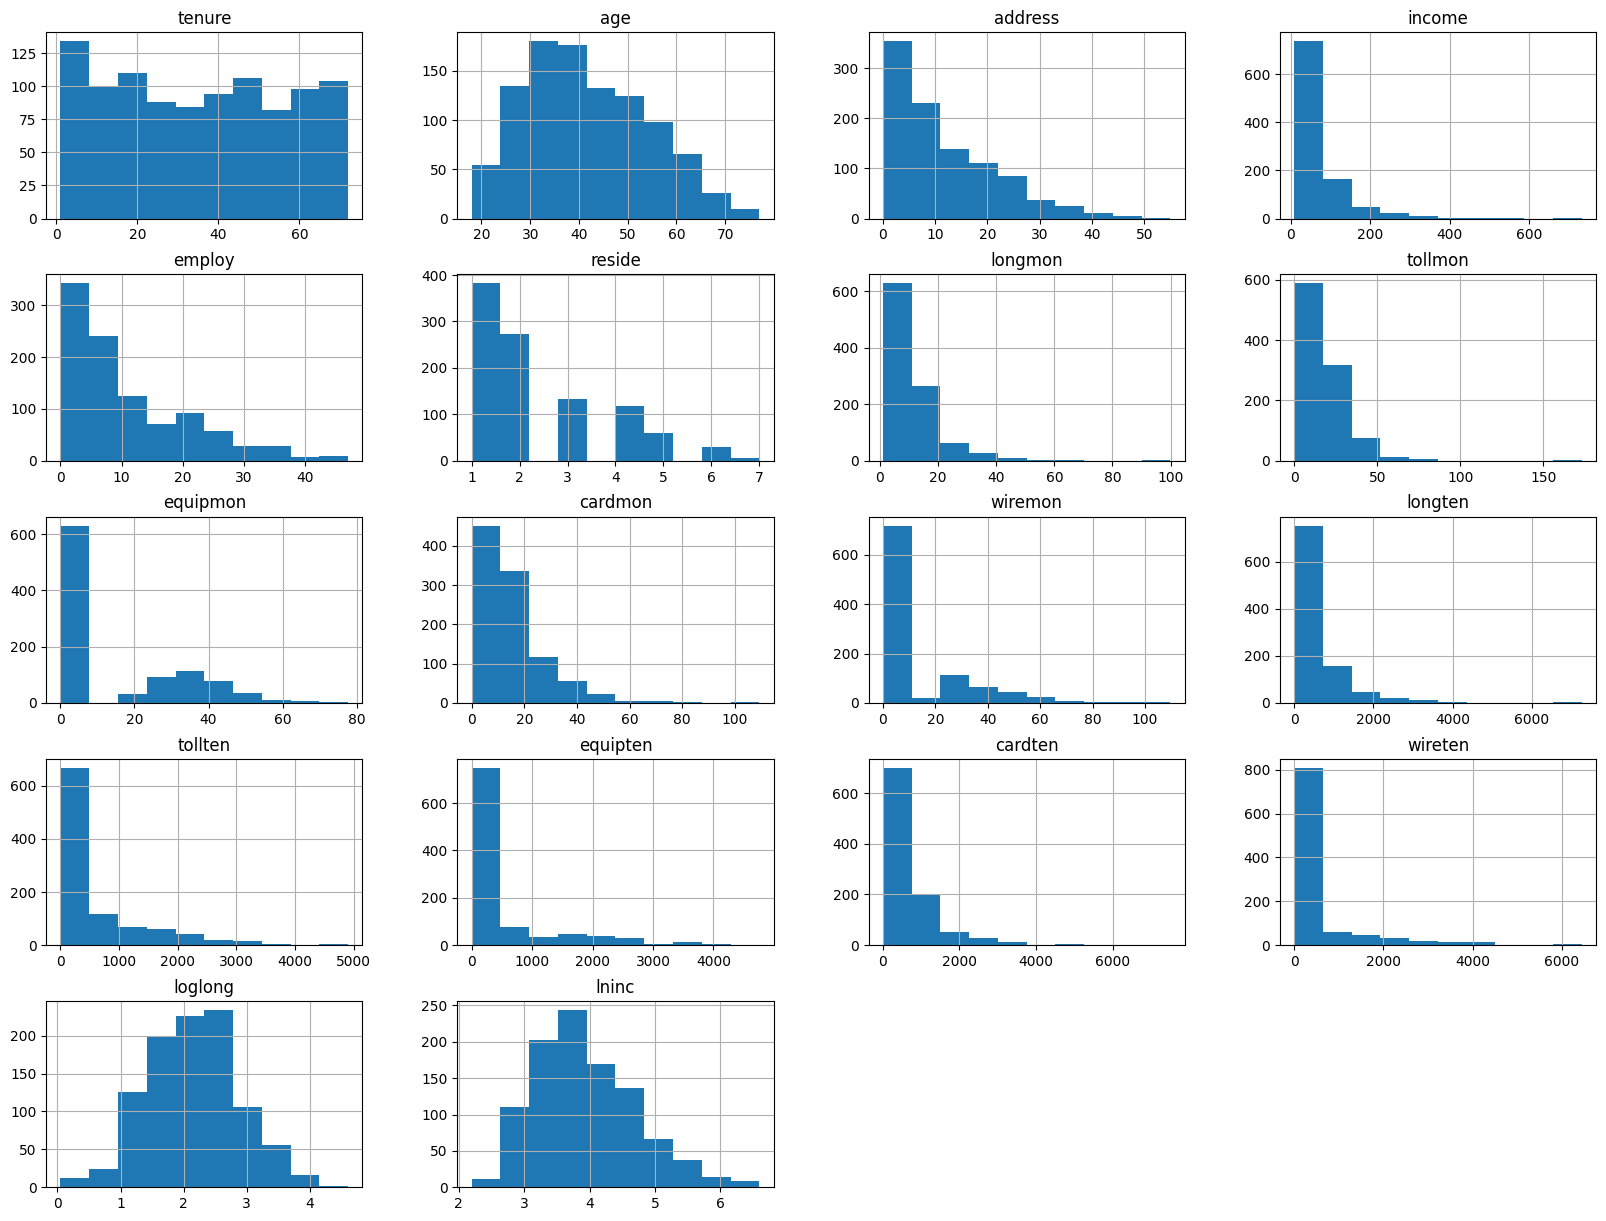

In [5]:
df.hist(figsize=(20, 15))

### Outliers Commentary
Some very noticeable outliers: longmon, tollmon, cardmon, longten, ,income, tollten, cardten, equipten and wireten. I will be removing these from the data set.

There are going to be outliers that cause some skew to the data but due to the small size nature of my data set, I will be keeping them.

In [6]:
# Making a copy of my dataframe to not manipulate original data.
churn = df.copy()

In [7]:
# Removing very noticeable outliers
churn = churn.loc[(churn['longmon'] < 40)]
churn = churn.loc[(churn['tollmon'] < 60)]
churn = churn.loc[(churn['cardmon'] < 90)]
churn = churn.loc[(churn['longten'] < 2500)]
churn = churn.loc[(churn['income'] < 600)]
churn = churn.loc[(churn['tollten'] < 4000)]
churn = churn.loc[(churn['cardten'] < 4000)]
churn = churn.loc[(churn['wireten'] < 4000)]
churn = churn.loc[(churn['equipten'] < 3000)]

array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'address'}>,
        <Axes: title={'center': 'income'}>],
       [<Axes: title={'center': 'employ'}>,
        <Axes: title={'center': 'reside'}>,
        <Axes: title={'center': 'longmon'}>,
        <Axes: title={'center': 'tollmon'}>],
       [<Axes: title={'center': 'equipmon'}>,
        <Axes: title={'center': 'cardmon'}>,
        <Axes: title={'center': 'wiremon'}>,
        <Axes: title={'center': 'longten'}>],
       [<Axes: title={'center': 'tollten'}>,
        <Axes: title={'center': 'equipten'}>,
        <Axes: title={'center': 'cardten'}>,
        <Axes: title={'center': 'wireten'}>],
       [<Axes: title={'center': 'loglong'}>,
        <Axes: title={'center': 'lninc'}>, <Axes: >, <Axes: >]],
      dtype=object)

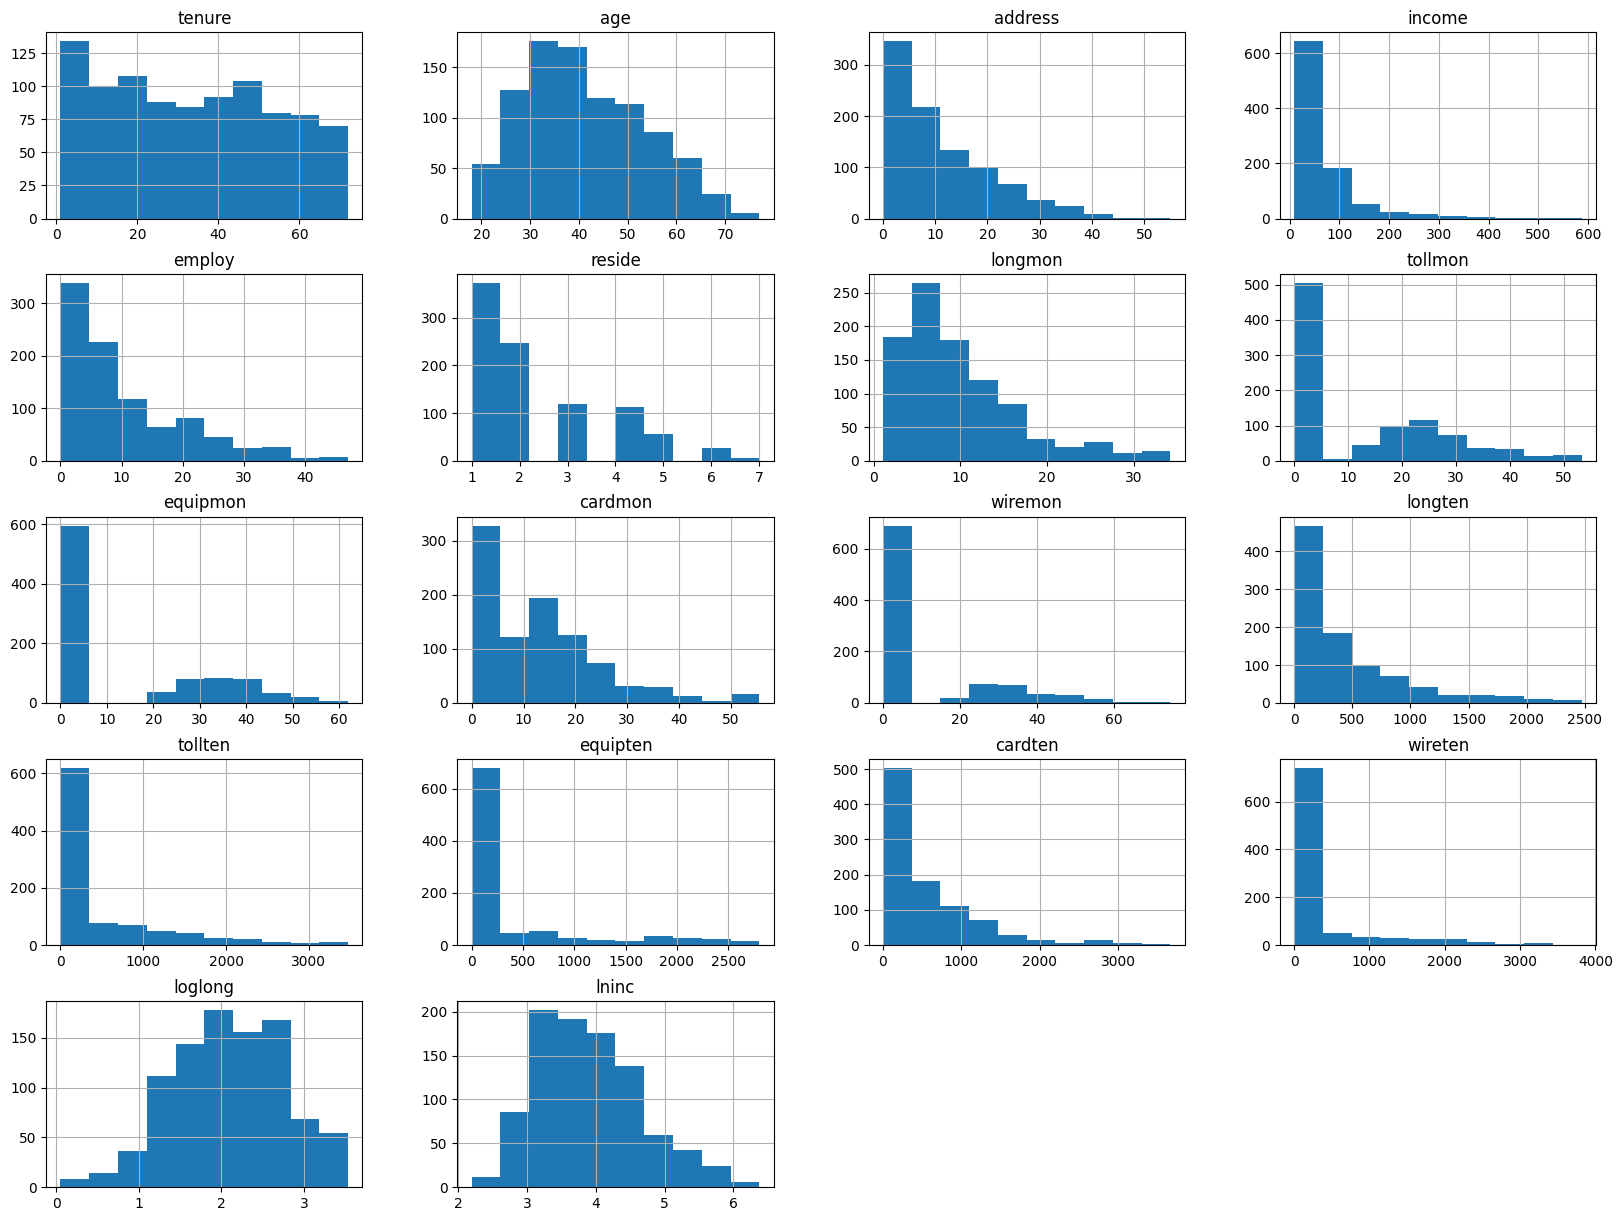

In [8]:
churn.hist(figsize=(20, 15))

In [8]:
#Checking for nulls
churn.isnull().sum()

cust_id     0
region      0
tenure      0
age         0
marital     0
address     0
income      0
ed          0
employ      0
retire      0
gender      0
reside      0
tollfree    0
equip       0
callcard    0
wireless    0
longmon     0
tollmon     0
equipmon    0
cardmon     0
wiremon     0
longten     0
tollten     0
equipten    0
cardten     0
wireten     0
multline    0
voice       0
pager       0
internet    0
callid      0
callwait    0
forward     0
confer      0
ebill       0
loglong     0
lninc       0
custcat     0
churn       0
dtype: int64

In [9]:
#Checking for empty strings
rows_with_empty_strings = df.loc[(df == ' ').any(axis=1)]
rows_with_empty_strings

,cust_id,region,tenure,age,marital,address,income,ed,employ,retire,...,internet,callid,callwait,forward,confer,ebill,loglong,lninc,custcat,churn


### Looking at spread of data

In [10]:
churn['marital'].value_counts(normalize=True), churn['retire'].value_counts(normalize=True), churn['gender'].value_counts(normalize=True), churn['ed'].value_counts(normalize=True), churn['reside'].value_counts(normalize=True),


(marital
 N    0.513859
 Y    0.486141
 Name: proportion, dtype: float64,
 retire
 N    0.965885
 Y    0.034115
 Name: proportion, dtype: float64,
 gender
 Y    0.501066
 N    0.498934
 Name: proportion, dtype: float64,
 ed
 E2    0.292111
 E1    0.219616
 E3    0.219616
 E4    0.213220
 E5    0.055437
 Name: proportion, dtype: float64,
 reside
 1    0.396588
 2    0.262260
 3    0.127932
 4    0.119403
 5    0.059701
 6    0.027719
 7    0.006397
 Name: proportion, dtype: float64)

In [11]:
#Checking distribution of services
churn['multline'].value_counts(normalize=True), churn['tollfree'].value_counts(normalize=True), churn['equip'].value_counts(normalize=True),  churn['callcard'].value_counts(normalize=True), churn['wireless'].value_counts(normalize=True), churn['internet'].value_counts(normalize=True), churn['callid'].value_counts(normalize=True), churn['callwait'].value_counts(normalize=True), churn['forward'].value_counts(normalize=True), churn['confer'].value_counts(normalize=True), churn['ebill'].value_counts(normalize=True)


(multline
 N    0.571429
 Y    0.428571
 Name: proportion, dtype: float64,
 tollfree
 N    0.537313
 Y    0.462687
 Name: proportion, dtype: float64,
 equip
 N    0.635394
 Y    0.364606
 Name: proportion, dtype: float64,
 callcard
 Y    0.665245
 N    0.334755
 Name: proportion, dtype: float64,
 wireless
 N    0.735608
 Y    0.264392
 Name: proportion, dtype: float64,
 internet
 N    0.660981
 Y    0.339019
 Name: proportion, dtype: float64,
 callid
 N    0.509595
 Y    0.490405
 Name: proportion, dtype: float64,
 callwait
 N    0.509595
 Y    0.490405
 Name: proportion, dtype: float64,
 forward
 Y    0.503198
 N    0.496802
 Name: proportion, dtype: float64,
 confer
 Y    0.501066
 N    0.498934
 Name: proportion, dtype: float64,
 ebill
 N    0.637527
 Y    0.362473
 Name: proportion, dtype: float64)

In [12]:
#Examine if last two categorical variables are balanced
churn['churn'].value_counts(normalize=True), churn['custcat'].value_counts(normalize=True),

(churn
 N    0.729211
 Y    0.270789
 Name: proportion, dtype: float64,
 custcat
 C3    0.300640
 C1    0.266525
 C4    0.221748
 C2    0.211087
 Name: proportion, dtype: float64)

# High correlations

For the most part, we see that services monthly and tenure are going to be highlighly correlated with each other such as wiremon and wireten. When I build my model I might opt to only use one of the two to not bias the model.


In [13]:
#Finding highly correlated variables (90%+)
numerical_data = churn.select_dtypes(include=['number'])
numerical_data.corr()

,tenure,age,address,income,employ,reside,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,equipten,cardten,wireten,loglong,lninc
tenure,1.000000,0.452241,0.507279,0.246243,0.497498,-0.008818,0.777698,0.186660,-0.132915,0.405425,0.032755,0.839683,0.462842,0.256460,0.709545,0.266393,0.819284,0.298056
age,0.452241,1.000000,0.628127,0.396644,0.662743,-0.226728,0.379425,0.160476,-0.095064,0.296996,0.032372,0.421222,0.287448,0.048904,0.402002,0.108827,0.383059,0.420036
address,0.507279,0.628127,1.000000,0.239444,0.439939,-0.184378,0.444048,0.160251,-0.089625,0.271238,-0.021607,0.486005,0.308102,0.060209,0.434659,0.068702,0.438177,0.267743
income,0.246243,0.396644,0.239444,1.000000,0.646433,-0.080868,0.236865,0.221176,-0.013755,0.196645,0.086655,0.262923,0.271669,0.038635,0.234323,0.095798,0.217272,0.876665
employ,0.497498,0.662743,0.439939,0.646433,1.000000,-0.116386,0.426815,0.235810,-0.167635,0.317269,0.002018,0.480778,0.367769,-0.014741,0.464966,0.094394,0.412401,0.670525
reside,-0.008818,-0.226728,-0.184378,-0.080868,-0.116386,1.000000,-0.041039,0.035015,-0.019380,0.016162,0.048276,-0.054180,0.007687,-0.007978,-0.003764,0.046785,-0.018182,-0.113148
longmon,0.777698,0.379425,0.444048,0.236865,0.426815,-0.041039,1.000000,0.201934,-0.112480,0.367786,0.043306,0.959364,0.418775,0.169515,0.617868,0.235768,0.926746,0.271670
tollmon,0.186660,0.160476,0.160251,0.221176,0.235810,0.035015,0.201934,1.000000,0.032590,0.439845,0.437978,0.189232,0.870008,0.065358,0.320824,0.410618,0.209886,0.222289
equipmon,-0.132915,-0.095064,-0.089625,-0.013755,-0.167635,-0.019380,-0.112480,0.032590,1.000000,-0.058486,0.504503,-0.124155,-0.043226,0.787000,-0.107659,0.352617,-0.120468,0.038894
cardmon,0.405425,0.296996,0.271238,0.196645,0.317269,0.016162,0.367786,0.439845,-0.058486,1.000000,0.277474,0.393052,0.402645,0.081360,0.819569,0.277290,0.367055,0.239458


# Visualizations & Effects on Churn

I noticed that tenure seemed to be the strongest variable for churn. Because of that I decided to see relationship of variables on tenure. I want variables with more tenure. For 'Y'(or yes) on these variables we get more tenure: retire, multiline, forward, confer, callwait, marital, and longmon.

### Churn
Now for variables that have some difference in churn and no churn are age (younger more churn), employ (less time employed more churn), longten, tollten, and calling card experience more churn when tenure was shorter, and equipten and wirless ten experiences more churn when tenure was longer which was interesting. For monthly charges the only noticeable ones are equipmon (more churn for higher equipmon), wiremon (lower wiremon more churn), and longmon (less longmonm more churn)

### Tenure Analysis

Text(0.5, 1.0, 'Tenure and churn relationship')

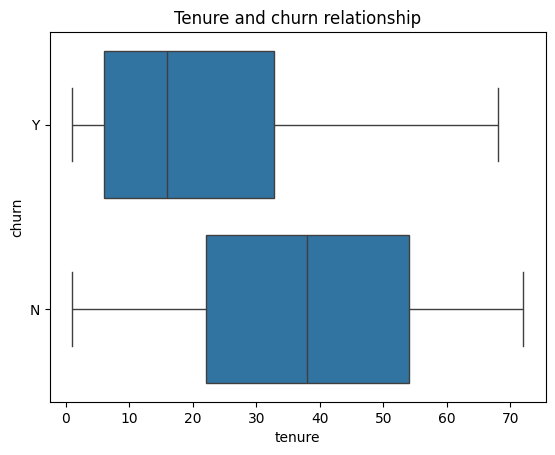

In [14]:
# Examine relationship between tenure and churn with boxplot
tenure_box = sns.boxplot(x='tenure',y='churn', data = churn)
tenure_box.set_title("Tenure and churn relationship")

Text(0.5, 1.0, 'Tenure and retire relationship')

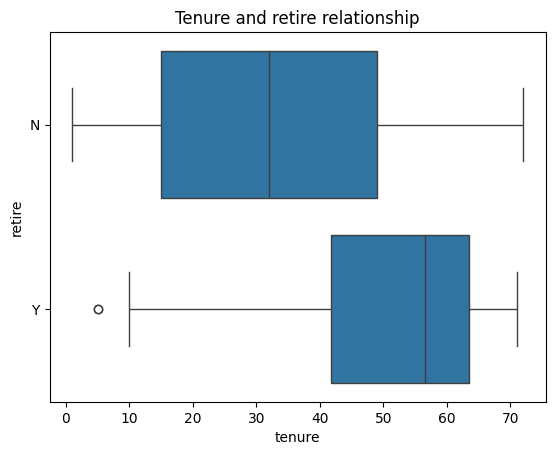

In [15]:
tnr = sns.boxplot(x='tenure',y='retire', data = churn)
tnr.set_title("Tenure and retire relationship")

Text(0.5, 1.0, 'Tenure and multline relationship')

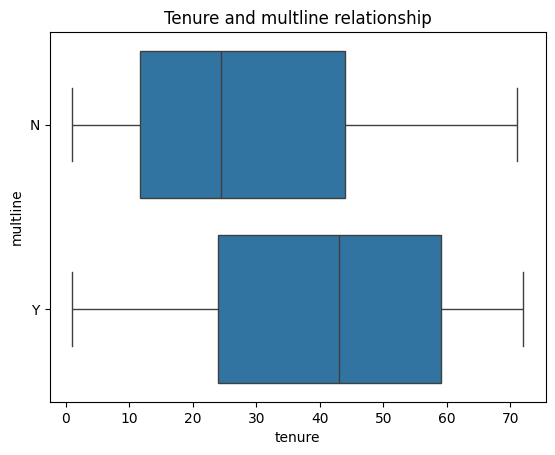

In [16]:
tnm = sns.boxplot(x='tenure',y='multline', data = churn)
tnm.set_title("Tenure and multline relationship")

Text(0.5, 1.0, 'Tenure and equip relationship')

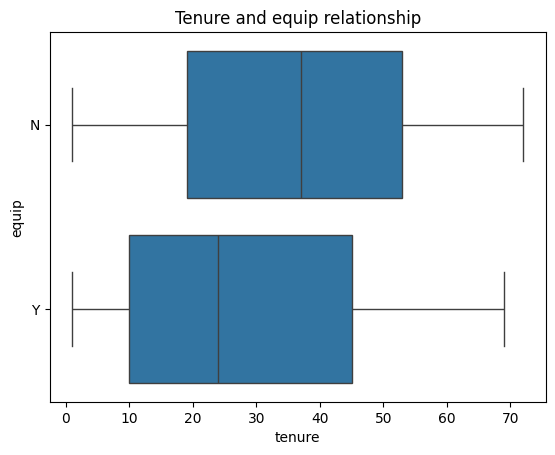

In [17]:
tne = sns.boxplot(x='tenure',y='equip', data = churn)
tne.set_title("Tenure and equip relationship")

Text(0.5, 1.0, 'Tenure and forward relationship')

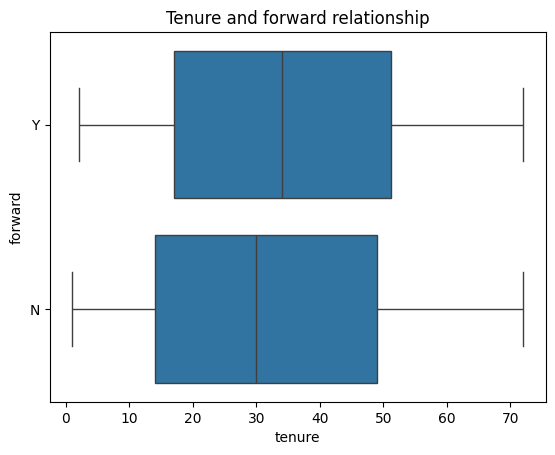

In [18]:
tnfr = sns.boxplot(x='tenure',y='forward', data = churn)
tnfr.set_title("Tenure and forward relationship")

Text(0.5, 1.0, 'Tenure and confer relationship')

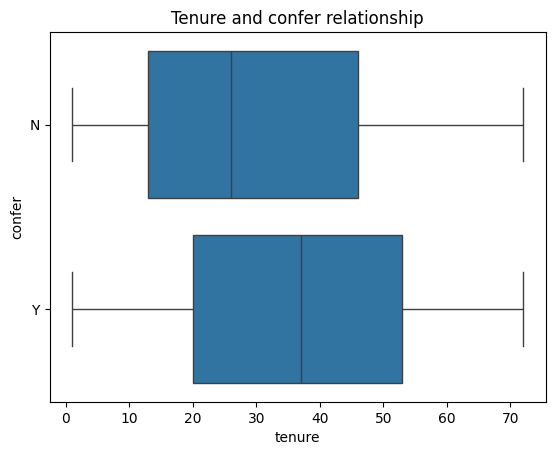

In [19]:
# Examine relationship between tenure and churn with boxplot
tnc = sns.boxplot(x='tenure',y='confer', data = churn)
tnc.set_title("Tenure and confer relationship")

Text(0.5, 1.0, 'Tenure and callwait relationship')

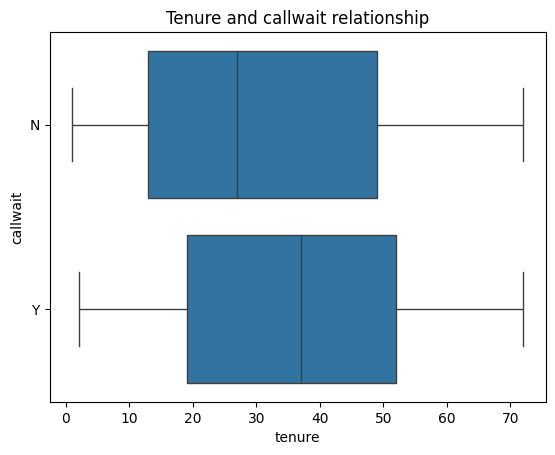

In [20]:
# Examine relationship between tenure and churn with boxplot
tncw = sns.boxplot(x='tenure',y='callwait', data = churn)
tncw.set_title("Tenure and callwait relationship")

Text(0.5, 1.0, 'Tenure and marital relationship')

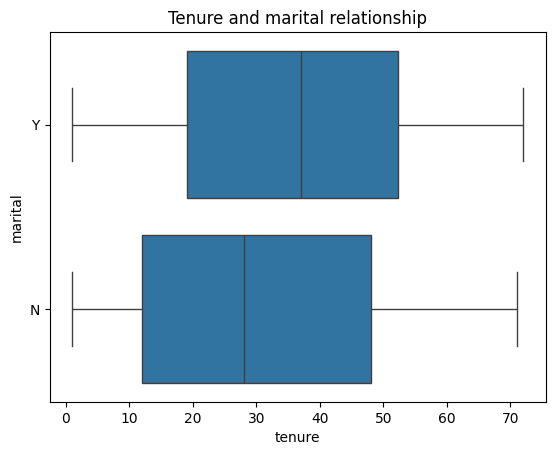

In [21]:
# Examine relationship between tenure and churn with boxplot
tnma = sns.boxplot(x='tenure',y='marital', data = churn)
tnma.set_title("Tenure and marital relationship")

Text(0.5, 1.0, 'Tenure and longmon relationship')

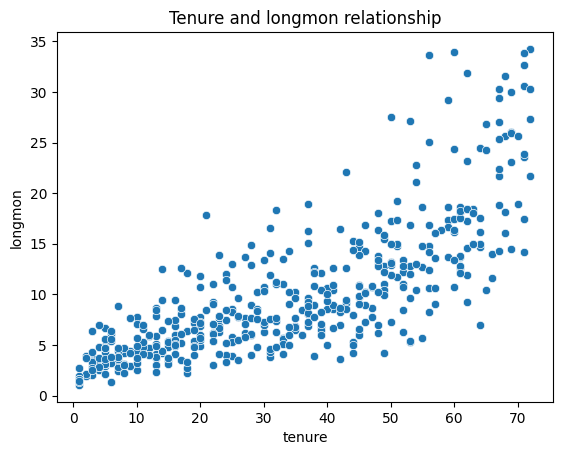

In [22]:
tnl = sns.scatterplot(x='tenure',y='longmon', data = churn)
tnl.set_title("Tenure and longmon relationship")


### Churn Analysis

Text(0.5, 1.0, 'Age and churn relationship')

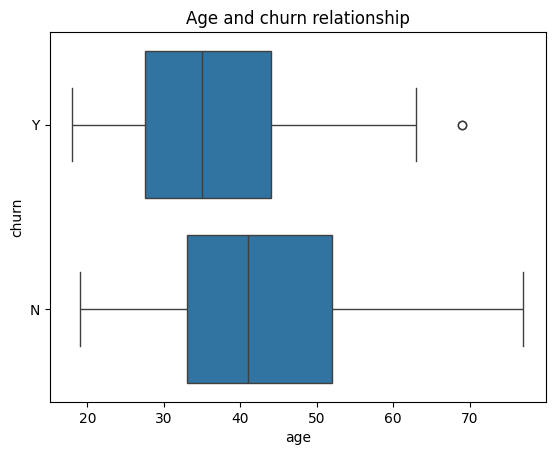

In [23]:
age_box = sns.boxplot(x='age',y='churn', data = churn)
age_box.set_title("Age and churn relationship")

Text(0.5, 1.0, 'Time employed and churn relationship')

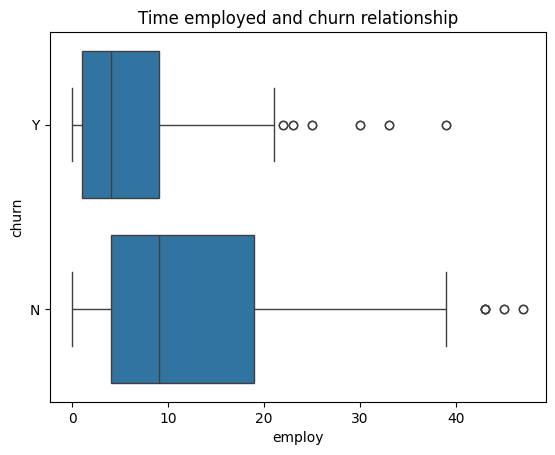

In [25]:
employ_box = sns.boxplot(x='employ',y='churn', data = churn)
employ_box.set_title("Time employed and churn relationship")

(0.0, 2000.0)

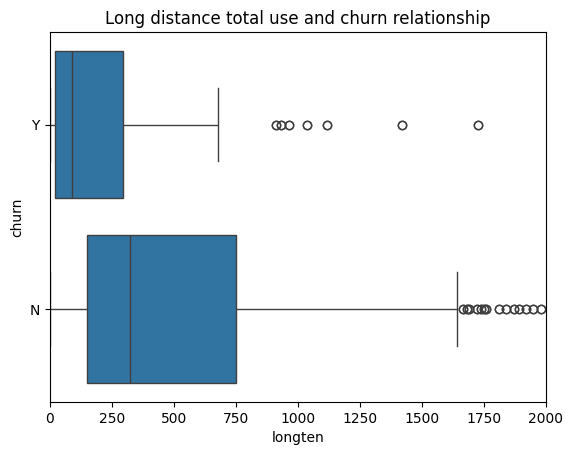

In [26]:
long_box = sns.boxplot(x='longten',y='churn', data = churn)
long_box.set_title("Long distance total use and churn relationship")
long_box.set_xlim([0, 2000])

(0.0, 2000.0)

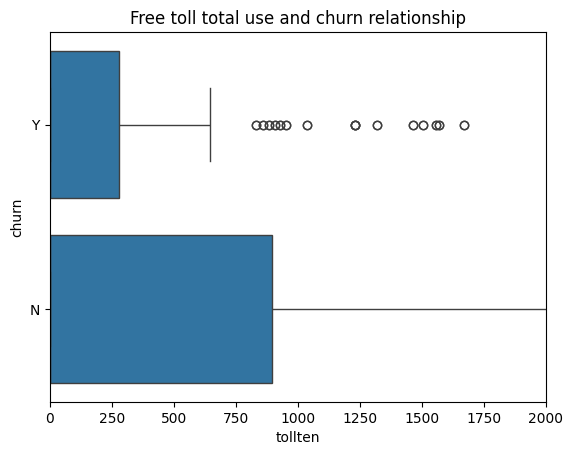

In [27]:
toll_box = sns.boxplot(x='tollten',y='churn', data = churn)
toll_box.set_title("Free toll total use and churn relationship")
toll_box.set_xlim([0, 2000])

(0.0, 3000.0)

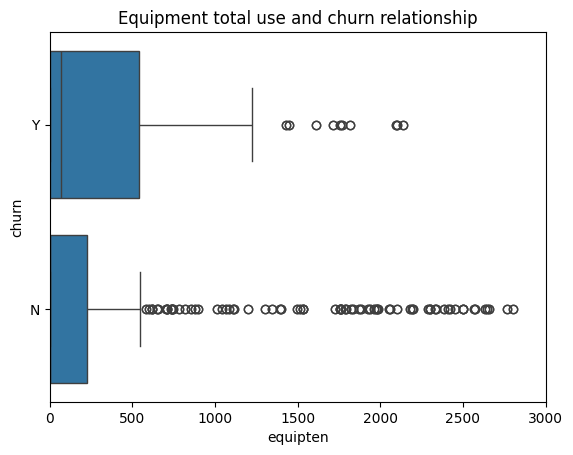

In [28]:
equip_box = sns.boxplot(x='equipten',y='churn', data = churn)
equip_box.set_title("Equipment total use and churn relationship")
equip_box.set_xlim([0, 3000])

(0.0, 2000.0)

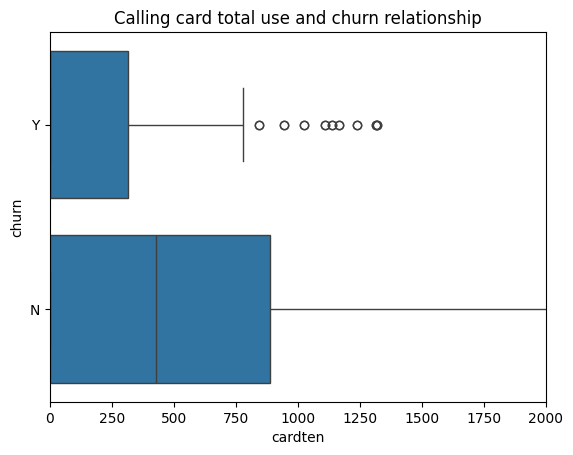

In [29]:
card_box = sns.boxplot(x='cardten',y='churn', data = churn)
card_box.set_title("Calling card total use and churn relationship")
card_box.set_xlim([0, 2000])

(0.0, 500.0)

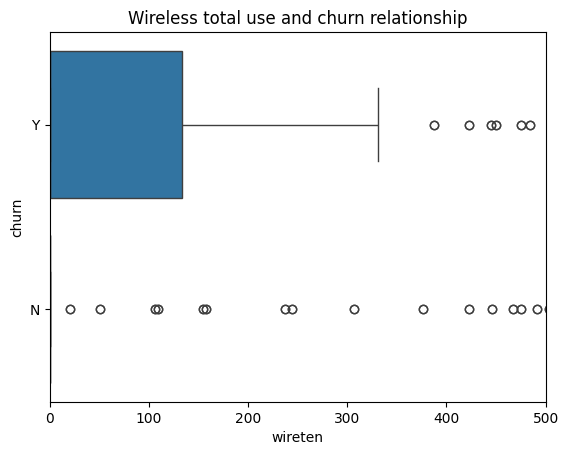

In [30]:
wireless_box = sns.boxplot(x='wireten',y='churn', data = churn)
wireless_box.set_title("Wireless total use and churn relationship")
wireless_box.set_xlim([0, 500])

### Services per month on Churn

Text(0.5, 1.0, 'Equipmon and churn relationship')

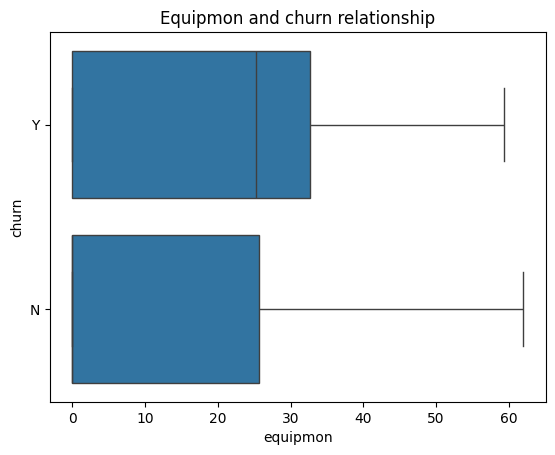

In [31]:
e_box = sns.boxplot(x='equipmon',y='churn', data = churn)
e_box.set_title("Equipmon and churn relationship")

Text(0.5, 1.0, 'wiremon and churn relationship')

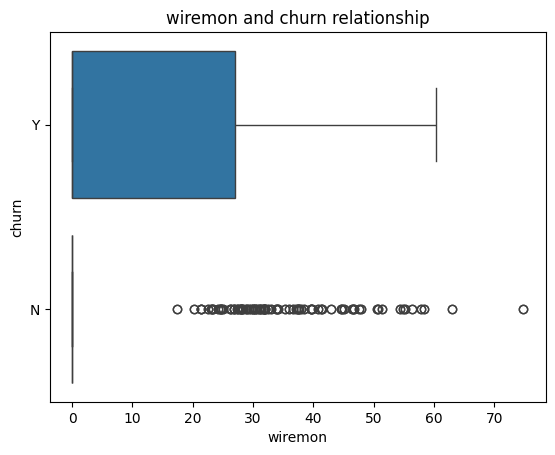

In [32]:
wmon = sns.boxplot(x='wiremon',y='churn', data = churn)
wmon.set_title("wiremon and churn relationship")

Text(0.5, 1.0, 'Longmon and churn relationship')

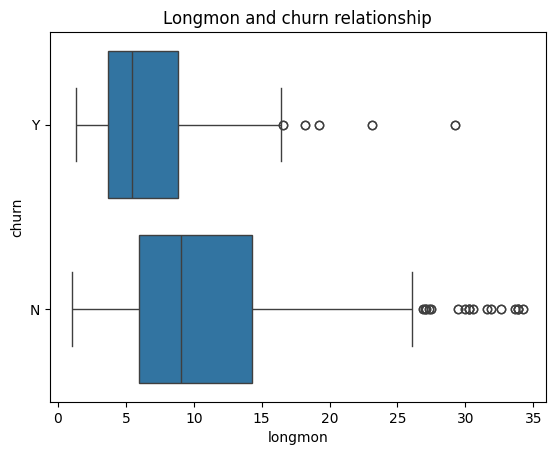

In [33]:
l_box = sns.boxplot(x='longmon',y='churn', data = churn)
l_box.set_title("Longmon and churn relationship")

# Choosing Variables

No Value Variables - Address, region, cust_id, custcat, educational level, Gender (only collects whether the customer has inputted a gender. Male/Female cannot be assumed) dont really work for predictive modeling. lning and loglong were calculations of variables so it would be redundant to have them.

As mentioned earlier, tenure is clearly a strong variable where more tenure means less churn. So we want to find variables that produce more tenure. Variables such as retire, multiline, forward, confer, callwait, marital, and longmon. 

Obviously we also want variables that have effect on churn so variables like age, employ, longten, tollten, and callten experience more churn when tenure was shorter. The opposite occurs for equipten and wirelessten where more tenure caused more churn. For monthly service cost, we have equipmon, wiremon, and longmon with the only real significance.


The final variables are: retire, multiline, forward, confer, callwait, marital,  longmon, age, employ, longten, tollten, equipten, wireten, callten, equipmon, and wiremon.


In [789]:
# Use my desired variables
desired_variables = ['age','tenure','employ','marital','retire'
      ,'multline','callwait','longmon','equipten','equipmon', 'wireten','wiremon',
      'tollten','longten','cardten','confer','forward',
                      'churn']
dca = churn[desired_variables] 

In [790]:
# Make a copy of dataframe for tuning
teleChurn = dca.copy()
teleChurn.loc [:, 'churn'] = teleChurn['churn'].replace({0: 'N', 1:'Y'})

# Preprocessing

In [791]:
# Convert to categorical datatypes
teleChurn['marital'] = teleChurn['marital'].astype('category')
teleChurn['retire'] = teleChurn['retire'].astype('category')
teleChurn['forward'] = teleChurn['forward'].astype('category')
teleChurn['multline'] = teleChurn['multline'].astype('category')
teleChurn['confer'] = teleChurn['confer'].astype('category')
teleChurn['callwait'] = teleChurn['callwait'].astype('category')

In [792]:
# Create dummy coded variables
teleChurn = pd.get_dummies(teleChurn, columns=['retire','confer','forward','marital','multline','callwait'], drop_first = True, dtype=int)
teleChurn

,age,tenure,employ,longmon,equipten,equipmon,wireten,wiremon,tollten,longten,cardten,churn,retire_Y,confer_Y,forward_Y,marital_Y,multline_Y,callwait_Y
0,44,13,5,3.70,0.00,0.0,0.0,0.0,0.00,37.45,110,Y,0,0,1,1,0,0
1,52,68,29,18.15,0.00,0.0,0.0,0.0,1247.20,1300.60,2150,N,0,1,0,1,0,1
2,30,23,2,6.30,0.00,0.0,0.0,0.0,0.00,157.05,0,N,0,1,1,1,0,0
3,22,45,4,10.90,0.00,0.0,0.0,0.0,0.00,504.50,415,Y,0,0,0,1,1,1
4,59,45,31,9.75,0.00,0.0,0.0,0.0,1240.15,449.05,505,N,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,43,50,4,15.00,0.00,0.0,0.0,0.0,2320.25,817.85,2645,N,0,1,1,0,0,1
996,52,34,19,4.95,0.00,0.0,0.0,0.0,649.35,153.50,430,N,0,1,1,1,0,0
997,46,15,1,3.70,547.95,42.5,475.3,33.1,207.35,40.55,0,Y,0,1,1,1,1,0
998,34,7,5,4.65,179.10,25.6,0.0,0.0,0.00,29.35,0,N,0,0,0,0,0,0


In [793]:
# Assign churn to variable and examine the porportion of target variable for data set
target = teleChurn['churn']
print(target.value_counts(normalize=True))

churn
N    0.729211
Y    0.270789
Name: proportion, dtype: float64


In [794]:
#Partition the data
predictors = teleChurn.drop(['churn'], axis = 1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(656, 17) (282, 17) (656,) (282,)


In [795]:
# Taking steps to balance the train data
# Combine predictors_train and target_train into a single DataFrame
combined_train_df = pd.concat([predictors_train, target_train], axis=1)

# Separate majority and minority classes
majority_df = combined_train_df[combined_train_df['churn'] == 'N']
minority_df = combined_train_df[combined_train_df['churn'] == 'Y']

# Undersample the majority class randomly
undersampled_majority = majority_df.sample(n=len(minority_df), random_state=5)

# Combine the undersampled majority class and the minority class
undersampled_data = pd.concat([undersampled_majority, minority_df])

# Shuffle the combined DataFrame to ensure randomness
balanced_data = undersampled_data.sample(frac=1, random_state=5)

# Split the balanced_data into predictors_train and target_train
predictors_train = balanced_data.drop(columns=['churn'])
target_train = balanced_data['churn']

In [796]:
#Check if its balanced
print(target_train.value_counts(normalize=True), target_train.shape)

churn
N    0.5
Y    0.5
Name: proportion, dtype: float64 (340,)


# Building Models

In [807]:
model_DT = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 12)
model_DT.fit(predictors_train, target_train)

prediction_on_test_DT = model_DT.predict(predictors_test)
print(classification_report(target_test, prediction_on_test_DT))

              precision    recall  f1-score   support

           N       0.92      0.74      0.82       198
           Y       0.59      0.86      0.70        84

    accuracy                           0.78       282
   macro avg       0.75      0.80      0.76       282
weighted avg       0.82      0.78      0.79       282



In [808]:
nb = MultinomialNB()
nb.fit(predictors_train, target_train)

predictions_on_test_nb = nb.predict(predictors_test)
print("Naive Bayes Classification Report:")
print(classification_report(target_test, predictions_on_test_nb))


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           N       0.84      0.70      0.77       198
           Y       0.50      0.69      0.58        84

    accuracy                           0.70       282
   macro avg       0.67      0.70      0.67       282
weighted avg       0.74      0.70      0.71       282



In [811]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(predictors_train, target_train)

predictions_on_test_knn = knn.predict(predictors_test)
print("K-Nearest Neighbors Classification Report:")
print(classification_report(target_test, predictions_on_test_knn))


K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           N       0.84      0.83      0.83       198
           Y       0.61      0.63      0.62        84

    accuracy                           0.77       282
   macro avg       0.73      0.73      0.73       282
weighted avg       0.77      0.77      0.77       282



In [812]:
rf = RandomForestClassifier(n_estimators = 150, random_state=0, max_depth = 9)
rf.fit(predictors_train, target_train)

predictions_on_test_rf = rf.predict(predictors_test)
print("Random Forest Classification Report:")
print(classification_report(target_test, predictions_on_test_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           N       0.94      0.83      0.88       198
           Y       0.69      0.88      0.77        84

    accuracy                           0.85       282
   macro avg       0.82      0.86      0.83       282
weighted avg       0.87      0.85      0.85       282



In [814]:
lr = LogisticRegression(max_iter=110)
lr.fit(predictors_train, target_train)

predictions_on_test_lr = lr.predict(predictors_test)
print("Logistic Regression Classification Report:")
print(classification_report(target_test, predictions_on_test_lr))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           N       0.84      0.75      0.79       198
           Y       0.53      0.65      0.59        84

    accuracy                           0.72       282
   macro avg       0.68      0.70      0.69       282
weighted avg       0.75      0.72      0.73       282



C:\Users\Scoldingatom\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [846]:
ada = AdaBoostClassifier(DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 12))
ada.fit(predictors_train, target_train)

predictions_on_test_ada = ada.predict(predictors_test)
print("AdaBoost Classification Report:")
print(classification_report(target_test, predictions_on_test_ada))


AdaBoost Classification Report:
              precision    recall  f1-score   support

           N       0.92      0.90      0.91       198
           Y       0.77      0.81      0.79        84

    accuracy                           0.87       282
   macro avg       0.85      0.85      0.85       282
weighted avg       0.87      0.87      0.87       282



C:\Users\Scoldingatom\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [847]:
gbc = GradientBoostingClassifier()
gbc.fit(predictors_train, target_train)

predictions_on_test_gbc = gbc.predict(predictors_test)
print("Gradient Boosting Classification Report:")
print(classification_report(target_test, predictions_on_test_gbc))


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           N       0.89      0.76      0.82       198
           Y       0.58      0.79      0.67        84

    accuracy                           0.77       282
   macro avg       0.74      0.77      0.74       282
weighted avg       0.80      0.77      0.77       282



# Ensemble Evaluation

In [889]:
#Aggregating the models into one
estimators = []
estimators.append(("K Nearest Neighbor", knn))
estimators.append(("Decision Tree", model_DT))
estimators.append(("Random Forest", rf))
estimators.append(("Adaptive Boost Classifier", ada))



In [890]:
#Ensembling best models using Voting
model_voting_a = VotingClassifier(estimators)
model_voting_a.fit(predictors_train, target_train)

C:\Users\Scoldingatom\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


VotingClassifier(estimators=[('K Nearest Neighbor',
                              KNeighborsClassifier(n_neighbors=8)),
                             ('Decision Tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=12,
                                                     random_state=1)),
                             ('Random Forest',
                              RandomForestClassifier(max_depth=9,
                                                     n_estimators=150,
                                                     random_state=0)),
                             ('Adaptive Boost Classifier',
                              AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                  max_depth=12,
                                                                                  random_state=1)))])

In [894]:
prediction_on_test_a = model_voting_a.predict(predictors_test)
print("Voting Classification Report:")
print(classification_report(target_test, prediction_on_test_a))

Voting Classification Report:
              precision    recall  f1-score   support

           N       0.94      0.93      0.94       198
           Y       0.85      0.86      0.85        84

    accuracy                           0.91       282
   macro avg       0.89      0.90      0.89       282
weighted avg       0.91      0.91      0.91       282



### Feature Importance

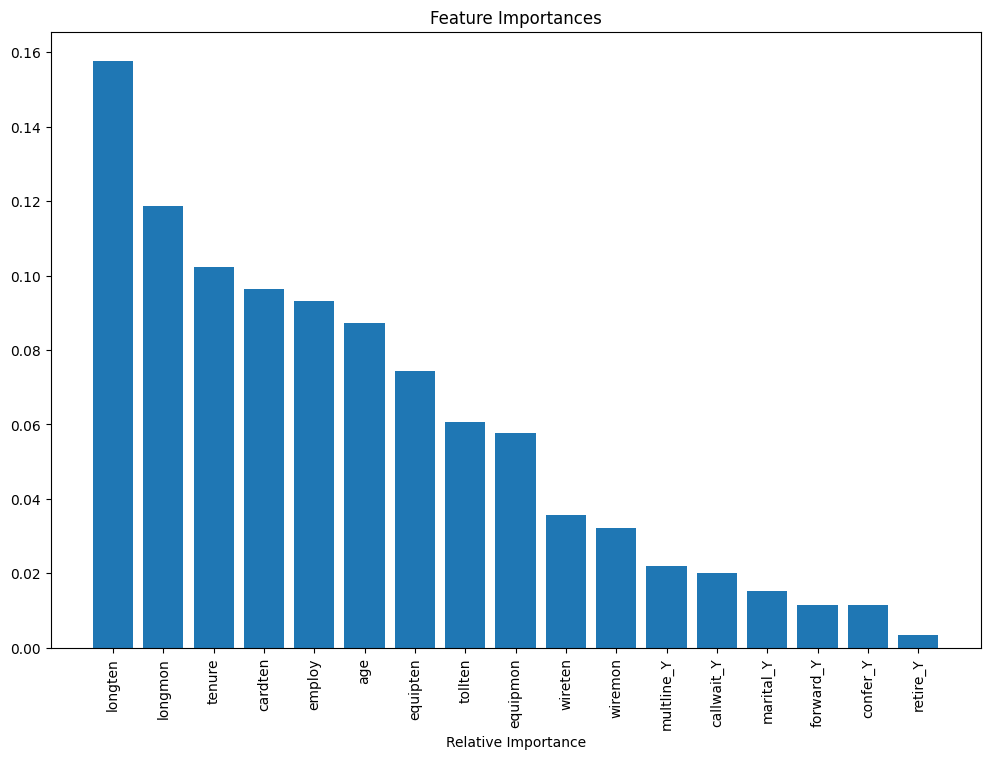

In [892]:
# Feature importance
importances = rf.feature_importances_
feature_names = predictors.columns

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(predictors_train.shape[1]), importances[indices], align='center')
plt.xticks(range(predictors_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel('Relative Importance')
plt.show()
